In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_df = pd.read_csv('German_Credit_Data.csv')
credit_df

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [3]:
credit_df['status'].value_counts()

status
0    700
1    300
Name: count, dtype: int64

In [4]:
x = credit_df.drop('status',axis=1)
y = credit_df['status']

In [5]:
encoded_credit_df = pd.get_dummies(x,drop_first=True)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = encoded_credit_df

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
no_of_features = len(x_train.columns)

In [11]:
depth = int(np.log2(no_of_features))
depth

4

In [12]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [13]:
## Initializing the Random Forest Classifier with max_dept and

## n_estimators

mod_rf = RandomForestClassifier(max_depth=depth, n_estimators = 100, random_state=101)
mod_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=101)

In [14]:
from sklearn import metrics

In [15]:
auc = metrics.roc_auc_score(y_test,mod_rf.predict_proba(x_test)[:,1])
auc

0.7701246122298755

### Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = [{'max_depth':[5,10,15], 'n_estimators':[50,100,150], 'max_features':['sqrt',0.2,0.3,0.5]}]
mod_rfc = RandomForestClassifier(random_state=42)
mod_rf_cv = GridSearchCV(mod_rfc,params,cv=10,scoring='roc_auc')
mod_rf_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': ['sqrt', 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150]}],
             scoring='roc_auc')

In [18]:
mod_rf_cv.best_score_

0.7542891156462584

In [19]:
mod_rf_cv.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

### Building the model with the best Params

In [23]:
## Fitting the model with the training set
# oob_score=True
# class balanced

In [22]:
mod_rf_fin = RandomForestClassifier(max_depth = 10, max_features ='sqrt', n_estimators = 100, oob_score = True, random_state=42)

In [24]:
mod_rf_fin.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, oob_score=True, random_state=42)

In [25]:
metrics.roc_auc_score(y_test,mod_rf_fin.predict_proba(x_test)[:,1])

0.7782217782217783

### Performance Metrics Random Forest

In [26]:
y_pred = mod_rf_fin.predict(x_test)
mat = metrics.confusion_matrix(y_test,y_pred)
mat

array([[192,  17],
       [ 65,  26]], dtype=int64)

In [27]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       209
           1       0.60      0.29      0.39        91

    accuracy                           0.73       300
   macro avg       0.68      0.60      0.61       300
weighted avg       0.70      0.73      0.69       300



In [28]:
mod_rf_fin.oob_score_

0.7514285714285714

#### Roc Curve

In [29]:
fpr,tpr,_ = metrics.roc_curve(y_test,mod_rf_fin.predict_proba(x_test)[:,1])
roc_auc = metrics.auc(fpr,tpr)

[]

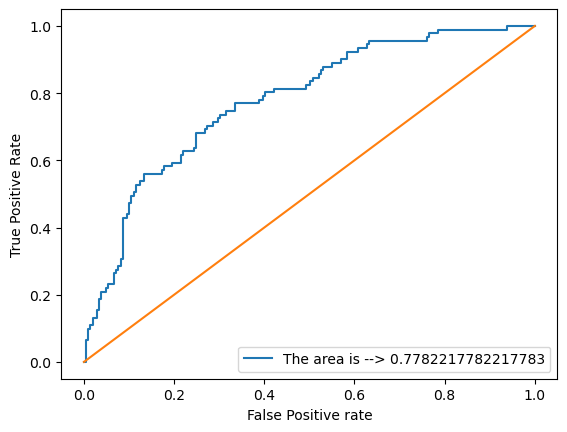

In [30]:
plt.plot(fpr,tpr,label = f'The area is --> {roc_auc}')
plt.plot(fpr,fpr)
plt.legend(loc = 4)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.plot()

### Feature Importance

In [34]:
feature_rank = mod_rf_fin.feature_importances_
x_train.columns.shape

(29,)

In [39]:
feature_rank = pd.DataFrame({'feature': x_train.columns, 'importance': mod_rf_fin.feature_importances_})
feature_rank

,feature,importance
0,duration,0.115370
1,amount,0.160980
2,inst_rate,0.046701
3,residing_since,0.044874
4,age,0.124990
5,num_credits,0.023299
6,checkin_acc_A12,0.024314
7,checkin_acc_A13,0.012595
8,checkin_acc_A14,0.084377
9,credit_history_A31,0.022438


In [40]:
feature_rank = feature_rank.sort_values('importance',ascending=False)
feature_rank

,feature,importance
1,amount,0.160980
4,age,0.124990
0,duration,0.115370
8,checkin_acc_A14,0.084377
2,inst_rate,0.046701
3,residing_since,0.044874
12,credit_history_A34,0.036445
25,inst_plans_A143,0.026130
6,checkin_acc_A12,0.024314
5,num_credits,0.023299


<Axes: xlabel='importance', ylabel='feature'>

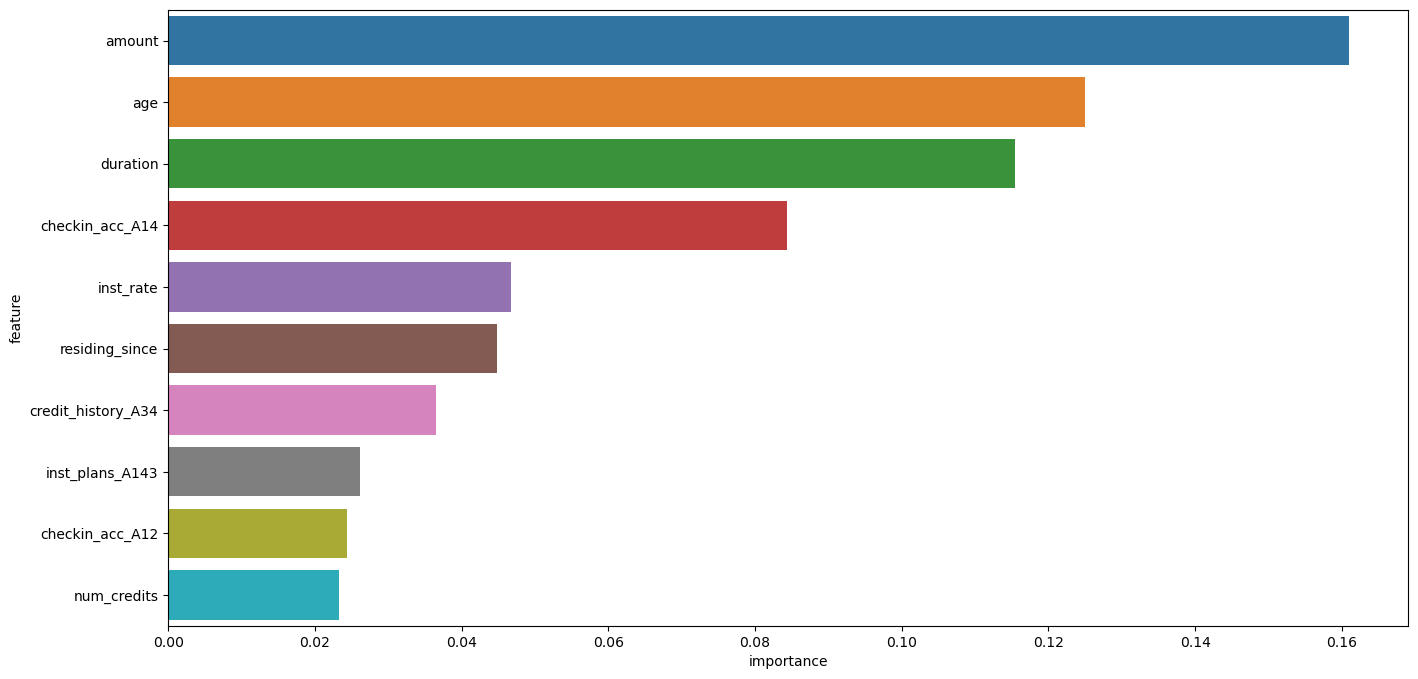

In [45]:
plt.figure(figsize = (16,8))
sns.barplot(x = feature_rank['importance'][:10], y = feature_rank['feature'][:10])

In [47]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum()*100
feature_rank.head(10)

,feature,importance,cumsum
1,amount,0.160980,16.097993
4,age,0.124990,28.597030
0,duration,0.115370,40.134033
8,checkin_acc_A14,0.084377,48.571722
2,inst_rate,0.046701,53.241853
3,residing_since,0.044874,57.729281
12,credit_history_A34,0.036445,61.373763
25,inst_plans_A143,0.026130,63.986799
6,checkin_acc_A12,0.024314,66.418214
5,num_credits,0.023299,68.748106
